In [13]:
# import required lib

In [29]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup as bs 
import requests
import re
from tqdm import tqdm

In [30]:
#oopening the input file

In [31]:
links = pd.read_excel('Input.xlsx')

In [32]:
#combining the stopwords

In [33]:

StopWords1 = open('StopWords_Auditor.txt').read().split()
StopWords2 = open('StopWords_Currencies.txt').read().split()
StopWords3 = open('StopWords_DatesandNumbers.txt').read().split()
StopWords4 = open('StopWords_Generic.txt').read().split()
StopWords5 = open('StopWords_GenericLong.txt').read().split()
StopWords6 = open('StopWords_Geographic.txt').read().split()
StopWords7 = open('StopWords_Names.txt').read().split()
s = StopWords1+StopWords2+StopWords3+StopWords4+StopWords5+StopWords6+StopWords7


positive = open('positive-words.txt').read().split()
negative = open('negative-words.txt').read().split()

In [34]:
# opening the output file where we will store our calculated parameters

In [35]:
output = pd.read_excel('Output Data Structure.xlsx')
output.head()

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,1.0,https://insights.blackcoffer.com/is-telehealth...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,https://insights.blackcoffer.com/how-telehealt...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,https://insights.blackcoffer.com/is-telemedici...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,https://insights.blackcoffer.com/is-telehealth...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,https://insights.blackcoffer.com/how-people-di...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# for loop to loop across all links and calculate the parameters

In [37]:
i = 0
for link in links['URL']:

    article = get_article(link) # extracting the required article 
    
    from nltk.tokenize import word_tokenize
    words = word_tokenize(article)        # tokenization of the article
    
    words=[word.lower() for word in words if word.isalpha()] # removale of characters unnessassary for our work
    
    clean = remove_stopwords(words,s)   # cleaning using stopwords provided 
    
    p_clean = [word.lower() for word in clean if word in positive] # positive words
    n_clean = [word.lower() for word in clean if word in negative] # negative words
    
    p_score = len(p_clean)  # positive score
    n_score =len(n_clean)   #neagative score
    polarity =(p_score - n_score)/ ((p_score + n_score) + 0.000001)
    sub_score =(p_score + n_score)/ ((len(clean)) + 0.000001)
    
    from nltk.tokenize import sent_tokenize  # sentences 
    sentence = sent_tokenize(article)
    
    avg_sent_len = len(clean)/len(sentence)
    per_complex = n_complex_words(clean)/len(clean)
    fog_index = 0.4*(avg_sent_len+per_complex)
    avg_n_words_sent = len(words)/len(sentence)
    n_comlpex =  n_complex_words(clean)
    word_count = len(clean)
    sylabe_per_word = n_sylables(clean)/word_count
    n_per_pronouns = n_pp(sentence)
    avg_word_len = str_len(clean)/len(clean)
    
    # now storing the calculated parameter to the output file 
    
    ## time consuming 
    
    output['POSITIVE SCORE'][i] = p_score
    output['NEGATIVE SCORE'][i] = n_score
    output['POLARITY SCORE'][i] = polarity
    output['SUBJECTIVITY SCORE'][i] = sub_score
    output['COMPLEX WORD COUNT'][i] = n_comlpex
    output['WORD COUNT'][i] = word_count
    output['SYLLABLE PER WORD'][i] = sylabe_per_word
    output['AVG SENTENCE LENGTH'][i] = avg_sent_len
    output['PERCENTAGE OF COMPLEX WORDS'][i] = per_complex
    output['FOG INDEX'][i] = fog_index
    output['AVG NUMBER OF WORDS PER SENTENCE'][i] =  avg_n_words_sent
    output['AVG WORD LENGTH'][i] =  avg_word_len
    output['PERSONAL PRONOUNS'][i] = n_per_pronouns
    i+=1

C:\Users\g ravindernath yadav\AppData\Local\Temp\ipykernel_16580\1703044152.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['POSITIVE SCORE'][i] = p_score
C:\Users\g ravindernath yadav\AppData\Local\Temp\ipykernel_16580\1703044152.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['NEGATIVE SCORE'][i] = n_score
C:\Users\g ravindernath yadav\AppData\Local\Temp\ipykernel_16580\1703044152.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

AttributeError: 'NoneType' object has no attribute 'get_text'

In [24]:
output.isna().sum()

URL_ID                              0
URL                                 0
POSITIVE SCORE                      0
NEGATIVE SCORE                      0
POLARITY SCORE                      0
SUBJECTIVITY SCORE                  0
AVG SENTENCE LENGTH                 0
PERCENTAGE OF COMPLEX WORDS         0
FOG INDEX                           0
AVG NUMBER OF WORDS PER SENTENCE    0
COMPLEX WORD COUNT                  0
WORD COUNT                          0
SYLLABLE PER WORD                   0
PERSONAL PRONOUNS                   0
AVG WORD LENGTH                     0
dtype: int64

In [25]:
output

,URL_ID,URL,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG SENTENCE LENGTH,PERCENTAGE OF COMPLEX WORDS,FOG INDEX,AVG NUMBER OF WORDS PER SENTENCE,COMPLEX WORD COUNT,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,1.0,https://insights.blackcoffer.com/is-telehealth...,30.0,8.0,0.578947,0.117647,12.423077,0.625387,5.219386,25.884615,202.0,323.0,2.891641,0.0,7.755418
1,2.0,https://insights.blackcoffer.com/how-telehealt...,37.0,16.0,0.396226,0.141333,6.944444,0.608000,3.020978,18.055556,228.0,375.0,2.813333,0.0,7.472000
2,3.0,https://insights.blackcoffer.com/is-telemedici...,74.0,28.0,0.450980,0.118056,9.191489,0.619213,3.924281,18.670213,535.0,864.0,2.987269,1.0,7.923611
3,4.0,https://insights.blackcoffer.com/is-telehealth...,58.0,22.0,0.450000,0.088988,10.333333,0.611791,4.378050,20.103448,550.0,899.0,2.912125,0.0,7.886541
4,5.0,https://insights.blackcoffer.com/how-people-di...,74.0,33.0,0.383178,0.125734,10.506173,0.589894,4.438427,22.209877,502.0,851.0,2.992949,1.0,8.018801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146.0,https://insights.blackcoffer.com/blockchain-fo...,21.0,26.0,-0.106383,0.121762,7.877551,0.484456,3.344803,18.000000,187.0,386.0,2.611399,6.0,7.655440
146,147.0,https://insights.blackcoffer.com/the-future-of...,35.0,10.0,0.555556,0.070203,10.338710,0.488300,4.330804,23.725806,313.0,641.0,2.614665,1.0,7.226209
147,148.0,https://insights.blackcoffer.com/big-data-anal...,28.0,45.0,-0.232877,0.128975,8.575758,0.535336,3.644437,17.409091,303.0,566.0,2.641343,2.0,7.100707
148,149.0,https://insights.blackcoffer.com/business-anal...,35.0,4.0,0.794872,0.107735,12.482759,0.604972,5.235092,24.655172,219.0,362.0,2.922652,0.0,8.093923


In [26]:
output.columns

Index(['URL_ID', 'URL', 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE',
       'SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH',
       'PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX',
       'AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT',
       'SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH'],
      dtype='object')

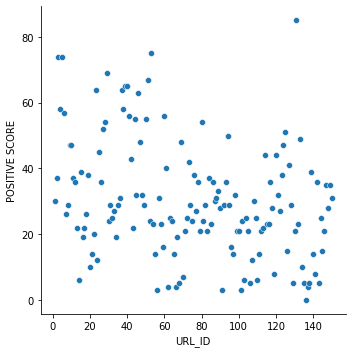

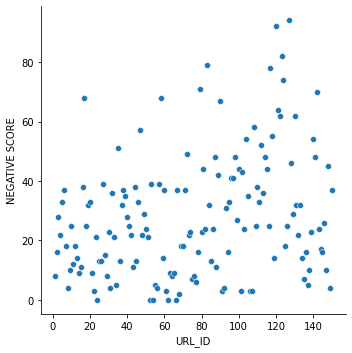

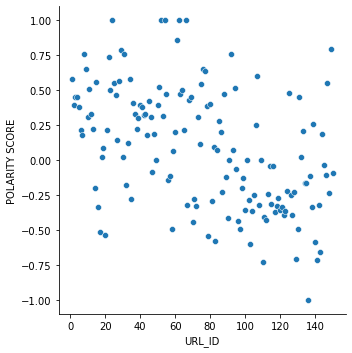

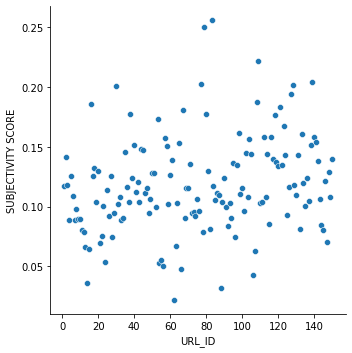

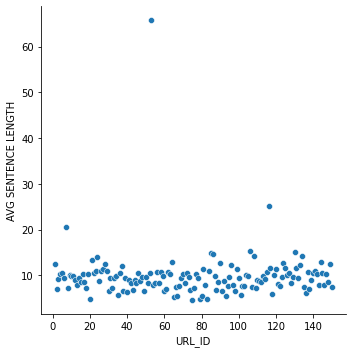

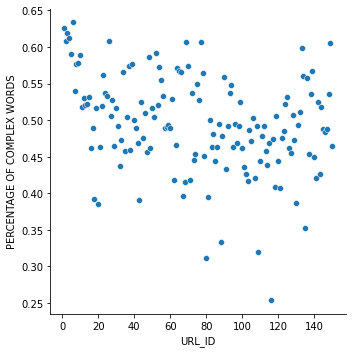

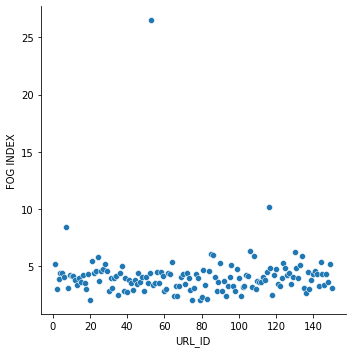

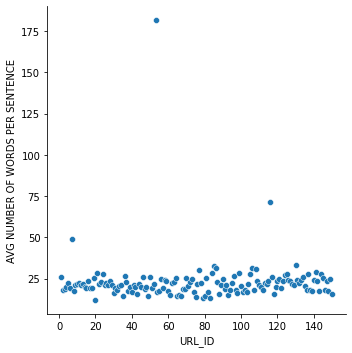

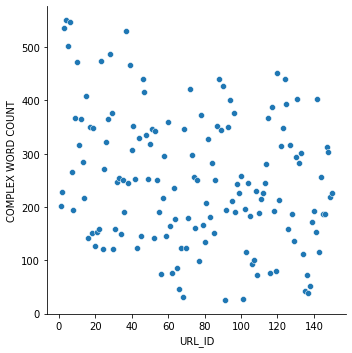

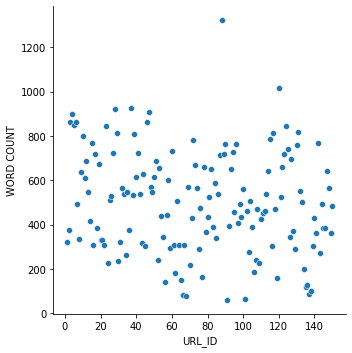

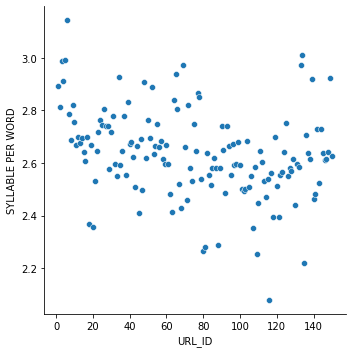

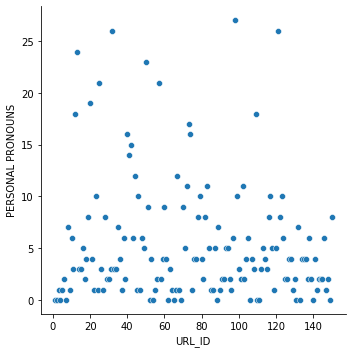

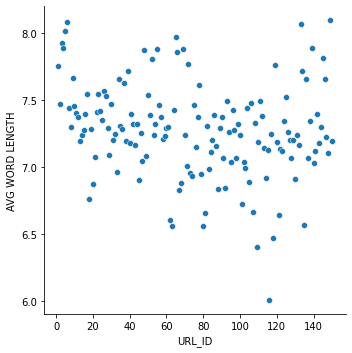

In [27]:
for i in [ 'POSITIVE SCORE', 'NEGATIVE SCORE', 'POLARITY SCORE','SUBJECTIVITY SCORE', 'AVG SENTENCE LENGTH','PERCENTAGE OF COMPLEX WORDS', 'FOG INDEX','AVG NUMBER OF WORDS PER SENTENCE', 'COMPLEX WORD COUNT', 'WORD COUNT','SYLLABLE PER WORD', 'PERSONAL PRONOUNS', 'AVG WORD LENGTH']:
    sns.relplot(x = 'URL_ID', y = i, data = output, kind = 'scatter')

In [23]:
# function to get the article
def get_article(link):
    headers = {
    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"
    }
    html = requests.get(link, headers = headers)
    content_html = html.content
    soup = bs(content_html, 'html.parser')
    title = soup.find('title').get_text()
    article_content = soup.find('div', class_ = 'td-post-content').get_text()
    article = title+article_content
    return article

In [24]:
# to remove the stop words
def remove_stopwords(word,StopWords):
    s_lower = []
    for i in s:
        s_lower.append(i.lower())
    clean = []
    for i in words:
        if i.lower() not in s_lower:
            clean.append(i)
    return clean

In [25]:
# calculate the number of personal pronouns
def n_pp(sentence):
    pronounRegex = re.compile(r'\b(I|we|my|ours|(?-i:us))\b',re.I)
    pronouns = []
    for i in sentence:
        if len(pronounRegex.findall(i)) >0:
            pronouns.append( pronounRegex.findall(i))
    return len(pronouns)

In [26]:
# to calculate the total number of letters in the article
def str_len(word_list):
    str_clean = ''
    for i in word_list:
        str_clean += i 
    return len(str_clean)

In [27]:
# calculate the number of comple words i.e words have 2+ vowel except 'ed','es'
def n_complex_words(list_words):
    complex_word = 0
    for word in list_words:
        score = 0
        if len(word) > 2:   #  min no of vowels >2 therfore the word must be atleast a three letter word
            if (word[-2]+word[-1]) not in ['es','ed']: 
                for i in  ['a','e','i','o','u']:
                    for j in range(0,len(word)):
                        if i == word[j]:
                            score += 1   # adding if ed and es not there and score  = number  of syllables
            else:
                for i in  ['a','e','i','o','u']:
                    for j in range(0,len(word)):
                        if i == word[j]:
                            score += 1  # adding to the socre including the es and es
                score = score - 1  # making a correction for the es and ed with was counted
            if score > 2:
                complex_word += 1
    return complex_word

In [28]:
def n_sylables(list_words):
    score = 0
    for word in list_words:
        
        if len(word) > 2:
            if (word[-2]+word[-1]) not in ['es','ed']:
                for i in  ['a','e','i','o','u']:
                    for j in range(0,len(word)):
                        if i == word[j]:
                            score += 1
            else:
                for i in  ['a','e','i','o','u']:
                    for j in range(0,len(word)):
                        if i == word[j]:
                            score += 1
                score = score - 1
    return score

In [28]:
output.to_excel('Solved Output Data Structure.xlsx')

In [16]:
# for link in links['URL']:
#     article = get_article(link)
#     from nltk.tokenize import word_tokenize
#     words = word_tokenize(article)
    
#     words=[word.lower() for word in words if word.isalpha()]
    
#     clean = remove_stopwords(words,s)
    
#     p_clean = [word.lower() for word in clean if word in positive]
#     n_clean = [word.lower() for word in clean if word in negative]
    
#     p_score = []
#     p_score.append(len(p_clean))
    
#     n_score = []
#     n_score.append(len(n_clean))
    
#     polarity = []
#     polarity.append((len(p_clean) - len(n_clean))/ ((len(p_clean) + len(n_clean)) + 0.000001))
    
#     sub_score = []
#     sub_score.append((len(p_clean) +len(n_clean))/ ((len(clean)) + 0.000001))
    
#     from nltk.tokenize import sent_tokenize
#     sentence = sent_tokenize(article)
    
#     avg_sent_len = []
#     avg_sent_len.append(len(clean)/len(sentence))
    
#     per_complex = []
#     per_complex.append(n_complex_words(clean)/len(clean))
    
#     fog_index = []
#     fog_index.append(0.4*(avg_sent_len+per_complex))
    
#     avg_n_words_sent = []
#     avg_n_words_sent.append(len(words)/len(sentence))
    
#     n_comlpex = []
#     n_comlpex.append(n_complex_words(clean))
    
#     word_count = []
#     word_count.append(len(clean))
    
#     sylabe_per_word = []
#     sylabe_per_word.append(n_sylables(clean)/word_count)
    
#     n_per_pronouns = []
#     n_per_pronouns.append(n_pp(sentence))
    
#     avg_word_len = []
#     avg_word_len.append(str_len(clean)/len(clean))

In [10]:
links['URL'][0]

'https://insights.blackcoffer.com/is-telehealth-the-future-of-healthcare-3/'

In [18]:
article = get_article(links['URL'][0])

In [21]:
import re
article = re.sub('\n',' ', article)

In [25]:
article
from textatistic import Textatistic

In [26]:
r_scores = Textatistic(article).scores

In [27]:
r_scores

{'flesch_score': 39.789281690140854,
 'fleschkincaid_score': 14.764873239436621,
 'gunningfog_score': 17.83887323943662,
 'smog_score': 15.381575749822971,
 'dalechall_score': 11.116506197183098}

In [31]:
r_scores = [Textatistic(get_article(link)).scores['gunningfog_score']  for link in links['URL']]

In [32]:
r_scores

[17.83887323943662,
 11.694017094017095,
 14.356418819310313,
 14.903565721006942,
 16.71435309973046,
 14.046112330772047,
 25.512473271560943,
 12.986203698933593,
 15.290245083793472,
 15.147352968404903,
 14.075543101630059,
 13.373320222877746,
 13.765478645066274,
 13.637803067788225,
 12.91183241252302,
 14.312254786658514,
 13.069266947107096,
 10.778393035535892,
 14.093417588204318,
 8.303626107977438,
 15.477541585004273,
 15.040375787338528,
 15.640889775448997,
 18.261015452538633,
 13.093225625276341,
 15.569175021987688,
 16.677635083150857,
 16.05433163911787,
 14.060791001394216,
 12.472562955989645,
 14.911930091185411,
 11.493647912885663,
 14.241593934585206,
 15.632531500572737,
 11.016706522144002,
 15.79541080680977,
 16.597043979812547,
 11.353196464802778,
 14.905859056493885,
 11.525546558704455,
 13.35970671554741,
 12.792004074357017,
 11.485938945420907,
 14.234879798759398,
 11.951431593536858,
 15.429537240602713,
 11.702110279101431,
 15.4202625359492,
 

In [33]:
df = links.iloc[:,:]

In [34]:
df['gunningfog_score'] = r_scores

In [36]:
df.sort_values(by = 'gunningfog_score', ascending = False)

,URL_ID,URL,gunningfog_score
52,53.0,https://insights.blackcoffer.com/ai-healthcare...,85.622551
6,7.0,https://insights.blackcoffer.com/how-telehealt...,25.512473
115,116.0,https://insights.blackcoffer.com/how-will-covi...,22.921145
133,134.0,https://insights.blackcoffer.com/coronavirus-d...,21.255303
143,144.0,https://insights.blackcoffer.com/ensuring-grow...,18.596473
...,...,...,...
82,83.0,https://insights.blackcoffer.com/how-to-overco...,9.058739
78,79.0,https://insights.blackcoffer.com/how-to-overco...,8.953004
87,88.0,https://insights.blackcoffer.com/impact-of-cov...,8.616596
74,75.0,https://insights.blackcoffer.com/why-does-your...,8.372408


In [42]:
df[df['gunningfog_score'] > 17]['URL'][52]

'https://insights.blackcoffer.com/ai-healthcare-revolution-ml-technology-algorithm-google-analytics-industrialrevolution/'

In [43]:
ar = get_article(df[df['gunningfog_score'] > 17]['URL'][52])

In [48]:
ar
rar = re.sub('\n', " ", ar)
score = Textatistic(ar).scores
score

{'flesch_score': -121.03955665024627,
 'fleschkincaid_score': 80.5727750410509,
 'gunningfog_score': 85.62255062944719,
 'smog_score': 30.193559967517054,
 'dalechall_score': 17.775956814449916}

In [49]:
score = Textatistic(rar).scores
score

{'flesch_score': -121.03955665024627,
 'fleschkincaid_score': 80.5727750410509,
 'gunningfog_score': 85.62255062944719,
 'smog_score': 30.193559967517054,
 'dalechall_score': 17.775956814449916}

In [50]:
rar

'How AI will impact the future of work? - Blackcoffer Insights AI experts believe it’s going to be one of the main drivers of the fourth Industrial Revolution and that it has the potential to not just transform the tech sectors and going to open a new chapter of the society of the world that people try to understand themselves better rather than the outside world with AI because people who are naysayer and kind of try to drum up these doomsday scenarios are pretty irresponsible. After all, In the next, five to ten years AI is going to deliver so many improvements and the quality of our lives it is a renaissance, a golden age of machine- learning and artificial intelligence that was the realm of science fiction for the last several decades. AI is probably the most important thing humanities that have ever worked which is more profound than any work with technology, as it is important to harness the benefits and while minimizing the downside is focusing on autonomous systems like self-dr

In [52]:
pip install spacy

     --------------------------------------- 11.7/11.7 MB 13.6 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 112.8/112.8 kB 6.4 MB/s eta 0:00:00
     ------------------------------------- 448.0/448.0 kB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 11.4 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 13.6 MB/s eta 0:00:00
     ---------------------------------------- 42.8/42.8 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 58.6/58.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 12.4 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [53]:
import spacy

In [64]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(ar)
 
tokens= [ token.text for token in doc]
lemma = [token.lemma_ for token in doc]

pos = [ (token.text,token.pos_) for token in doc]
ner = [(ent.text, ent.label_) for ent in doc.ents]

In [66]:
len(tokens)

1924

In [81]:
nlp(' '.join(lemma))


how AI will impact the future of work ? - blackcoffer insight 
 AI expert believe it ’s go to be one of the main driver of the fourth Industrial Revolution and that it have the potential to not just transform the tech sector and go to open a new chapter of the society of the world that people try to understand themselves well rather than the outside world with AI because people who be naysayer and kind of try to drum up these doomsday scenario be pretty irresponsible . after all , in the next , five to ten year AI be go to deliver so many improvement and the quality of our life it be a renaissance , a golden age of machine- learning and artificial intelligence that be the realm of science fiction for the last several decade . ai be probably the most important thing humanity that have ever work which be more profound than any work with technology , as it be important to harness the benefit and while minimize the downside be focus on autonomous system like self - drive car see as the mot

In [72]:
ner[:5]

names = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

In [73]:
names

['Bill Gates', 'Ellen Musk', 'Ella', 'Blackcoffer Insights 28', 'Mihir Bhatt']

In [57]:
!python -m spacy download en_core_web_lg 

     -------------------------------------- 587.7/587.7 MB 1.3 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [74]:
name_list = []
for link in links['URL']:
    article = get_article(link)
    doc = nlp(article)
    names = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
    name_list.append(names)

In [75]:
name_list 

[['Ayushman Bharat',
  'Blackcoffer Insights',
  'Rishabh Sarkar',
  'Aayushman Pratap Singh',
  'Jagdish Sheth'],
 ['public(Leite,2018', 'Ramettaet al .2019', 'Blackcoffer Insights'],
 ['Blackcoffer Insights', 'Vinodh Korlepara'],
 ['Blackcoffer Insights', 'Uday Kovuri'],
 ['minds.16', 'Blackcoffer Insights', 'Sai priya', 'Sahithi duggi,'],
 ['Colds',
  'Blackcoffer Insights',
  'Krishna Vikas',
  'Thota',
  'Shiva Lagishetty, Woxsen University'],
 ['Blackcoffer Insights', 'Mihir Bhatt'],
 ['Metaverse',
  'Metaverse',
  'Metaverse',
  'Blackcoffer Insights',
  'Meghashree Agadi'],
 ['Metaverse Blockchain',
  'Metaverse',
  'Metaverse Top Wallet',
  'Blackcoffer Insights',
  'Santhosh Kumar M'],
 ['Mark Zuckerberg',
  'Mark',
  'Forrester',
  'Leslie Tarnacki',
  'Ted Sundquist',
  'Mark Zuckerberg',
  'Blackcoffer Insights',
  'Abhijit Kundu',
  'Sanjana Yadav'],
 ['Bank?Will',
  'Metaverse',
  'Metaverse',
  'Vauld',
  'Ken Griffin',
  'Mortgaging',
  'Blackcoffer Insights',
  'Jay O

In [76]:
df['names is articles'] = name_list

In [77]:
df

,URL_ID,URL,gunningfog_score,names is articles
0,1.0,https://insights.blackcoffer.com/is-telehealth...,17.838873,"[Ayushman Bharat, Blackcoffer Insights, Rishab..."
1,2.0,https://insights.blackcoffer.com/how-telehealt...,11.694017,"[public(Leite,2018, Ramettaet al .2019, Blackc..."
2,3.0,https://insights.blackcoffer.com/is-telemedici...,14.356419,"[Blackcoffer Insights, Vinodh Korlepara]"
3,4.0,https://insights.blackcoffer.com/is-telehealth...,14.903566,"[Blackcoffer Insights, Uday Kovuri]"
4,5.0,https://insights.blackcoffer.com/how-people-di...,16.714353,"[minds.16, Blackcoffer Insights, Sai priya, Sa..."
...,...,...,...,...
145,146.0,https://insights.blackcoffer.com/blockchain-fo...,12.898070,"[Ashok Chandra, Chandra, Kuangyi Wei, Parker F..."
146,147.0,https://insights.blackcoffer.com/the-future-of...,14.504153,"[Blackcoffer Insights, Vishnu Bajpai -]"
147,148.0,https://insights.blackcoffer.com/big-data-anal...,13.069798,"[Abhishek Rai, Blackcoffer Insights, Vivek Rai]"
148,149.0,https://insights.blackcoffer.com/business-anal...,18.273500,"[Tanmay Shrivastava, Vishnu Bajpai]"
